<a href="https://colab.research.google.com/github/MilovanMarrder/Modelo_Markowitz/blob/main/Modelo_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Ejercicio de inversión en Bienes Raices, CDT, empresa comercial y acciones de Apple
---

##definir data a trabajar

In [ ]:
import pandas as pd

# Cargar el archivo CSV
#file_path = '/content/Inversiones.csv'  # Actualiza esto con la ruta real de tu archivo CSV
#data_local = pd.read_csv(file_path)


Inversiones = [
          {
              "Periodo": "may-23",
              "Apartamento": -0.0006,
              "Acciones Apple": 0.0958,
              "CDT Occidente": 0.006,
              "Empresa comercial": 0.268292683
          },
          {
              "Periodo": "jun-23",
              "Apartamento": 0.0036,
              "Acciones Apple": 0.1099,
              "CDT Occidente": 0.0061,
              "Empresa comercial": 0.292682927
          },
          {
              "Periodo": "jul-23",
              "Apartamento": 0.0237,
              "Acciones Apple": 0.0614,
              "CDT Occidente": 0.0061,
              "Empresa comercial": 0.219512195
          },
          {
              "Periodo": "ago-23",
              "Apartamento": 0.0336,
              "Acciones Apple": -0.0314,
              "CDT Occidente": 0.0062,
              "Empresa comercial": 0.304878049
          },
          {
              "Periodo": "sep-23",
              "Apartamento": 0.0268,
              "Acciones Apple": -0.0339,
              "CDT Occidente": 0.0062,
              "Empresa comercial": 0.292682927
          },
          {
              "Periodo": "oct-23",
              "Apartamento": 0.009,
              "Acciones Apple": 0.0746,
              "CDT Occidente": 0.0062,
              "Empresa comercial": 0.317073171
          },
          {
              "Periodo": "nov-23",
              "Apartamento": 0.0393,
              "Acciones Apple": 0.0906,
              "CDT Occidente": 0.0063,
              "Empresa comercial": 0.359756098
          },
          {
              "Periodo": "dic-23",
              "Apartamento": 0.0662,
              "Acciones Apple": 0.0446,
              "CDT Occidente": 0.0063,
              "Empresa comercial": 0.396341463
          },
          {
              "Periodo": "ene-24",
              "Apartamento": 0.0389,
              "Acciones Apple": 0.0239,
              "CDT Occidente": 0.0063,
              "Empresa comercial": 0.097560976
          },
          {
              "Periodo": "feb-24",
              "Apartamento": -0.0233,
              "Acciones Apple": -0.0274,
              "CDT Occidente": 0.0064,
              "Empresa comercial": 0.170731707
          },
          {
              "Periodo": "mar-24",
              "Apartamento": -0.059,
              "Acciones Apple": -0.0339,
              "CDT Occidente": 0.0064,
              "Empresa comercial": 0.40902439
          },
          {
              "Periodo": "abr-24",
              "Apartamento": -0.0521,
              "Acciones Apple": 0.0904,
              "CDT Occidente": 0.0065,
              "Empresa comercial": 0.219512195
          }
      ]

data_local = pd.DataFrame(Inversiones)
# Verificar los datos cargados
print(data_local.head())


  Periodo  Apartamento  Acciones Apple  CDT Occidente  Empresa comercial
0  may-23      -0.0006          0.0958         0.0060           0.268293
1  jun-23       0.0036          0.1099         0.0061           0.292683
2  jul-23       0.0237          0.0614         0.0061           0.219512
3  ago-23       0.0336         -0.0314         0.0062           0.304878
4  sep-23       0.0268         -0.0339         0.0062           0.292683


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#returns = pd.read_csv('/content/Inversiones.csv', sep=';')
returns = data_local.copy()
returns = returns.set_index('Periodo')

## Monto y riesgo de la inversión

In [ ]:
total_inversion = 1430000  # Esta parte la modifica a su inversión.

max_accepted_risk = 0.20  # Ajusta este valor según tu tolerancia al riesgo

## matriz de covarianza y rendimientos esperados

In [ ]:
# Calculamos la matriz de covarianza
cov_matrix = returns.cov()
print("Matriz de Covarianza:")
print(cov_matrix)

# Calculamos los rendimientos esperados (promedio)
expected_returns = returns.mean()
print("\nRendimientos Esperados:")
print(expected_returns)

Matriz de Covarianza:
                   Apartamento  Acciones Apple  CDT Occidente  \
Apartamento           0.001431        0.000160  -2.324091e-06   
Acciones Apple        0.000160        0.003234  -2.613636e-06   
CDT Occidente        -0.000002       -0.000003   2.090909e-08   
Empresa comercial     0.000187       -0.000020  -4.645233e-07   

                   Empresa comercial  
Apartamento             1.871384e-04  
Acciones Apple         -1.982224e-05  
CDT Occidente          -4.645233e-07  
Empresa comercial       8.320453e-03  

Rendimientos Esperados:
Apartamento          0.008842
Acciones Apple       0.038717
CDT Occidente        0.006250
Empresa comercial    0.279004
dtype: float64


## Modelo de Markowitz


Número de activos: 4
Forma de expected_returns: (4,)
Forma de cov_matrix: (4, 4)


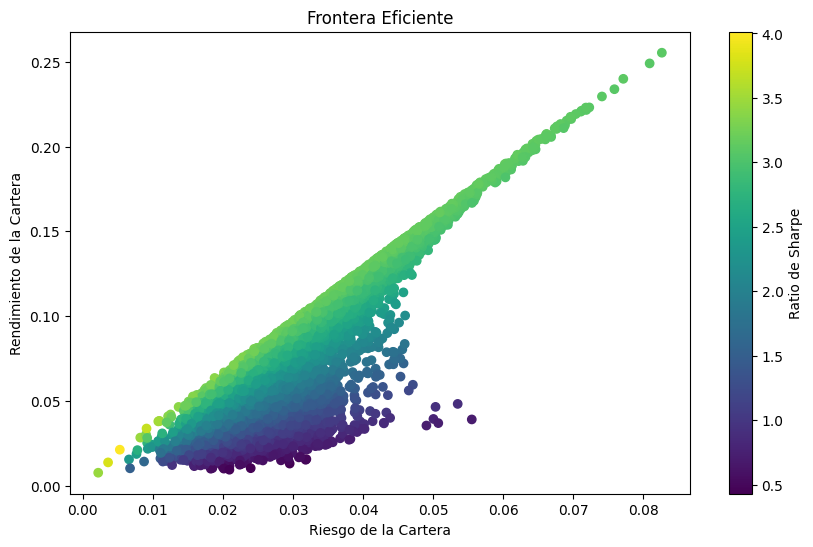


Cartera Óptima (Máximo Ratio de Sharpe):
Rendimiento: 0.0212
Riesgo: 0.0053
Ratio de Sharpe: 4.0130

Distribución de la inversión:
Activo Apartamento: 1.12%
Activo Acciones Apple: 4.95%
Activo CDT Occidente: 89.05%
Activo Empresa comercial: 4.88%


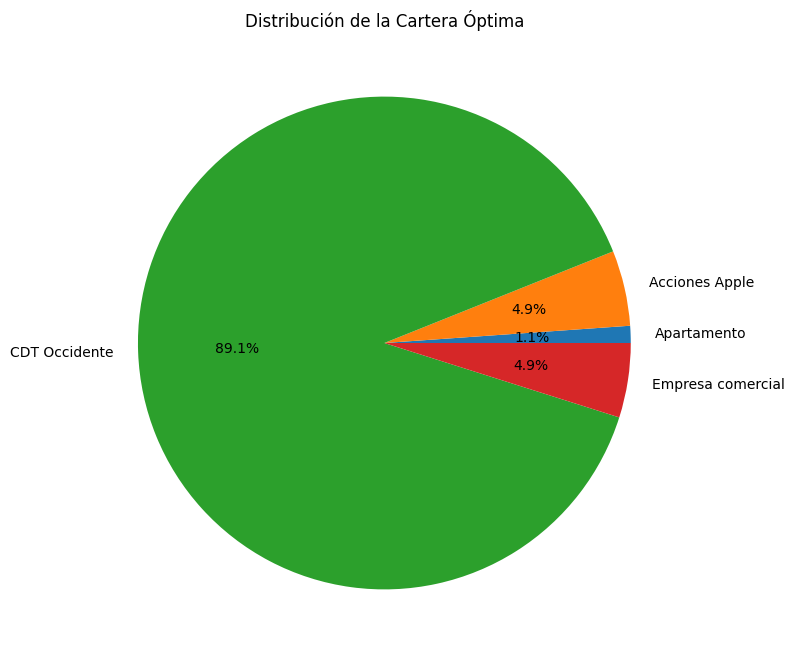

In [ ]:
# Función para calcular el rendimiento y riesgo de la cartera
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.sum(returns * weights)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_risk

# Comprobación de dimensiones
n_assets = len(returns.columns)
print(f"\nNúmero de activos: {n_assets}")
print(f"Forma de expected_returns: {expected_returns.shape}")
print(f"Forma de cov_matrix: {cov_matrix.shape}")


# Generamos carteras aleatorias
n_portfolios = 10000
results = np.zeros((3 + n_assets, n_portfolios))



for i in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    portfolio_return, portfolio_risk = portfolio_performance(weights, expected_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_risk
    results[2,i] = portfolio_return / portfolio_risk
    results[3:,i] = weights

# Filtramos carteras con un riesgo menor o igual al aceptado
filtered_results = results[:, results[1,:] <= max_accepted_risk]

plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Riesgo de la Cartera')
plt.ylabel('Rendimiento de la Cartera')
plt.title('Frontera Eficiente')
plt.show()

# Encontramos la cartera de máximo Sharpe ratio dentro del riesgo aceptado
if filtered_results.shape[1] > 0:
    max_sharpe_idx = np.argmax(results[2])
    print("\nCartera Óptima (Máximo Ratio de Sharpe):")
    print(f"Rendimiento: {results[0,max_sharpe_idx]:.4f}")
    print(f"Riesgo: {results[1,max_sharpe_idx]:.4f}")
    print(f"Ratio de Sharpe: {results[2,max_sharpe_idx]:.4f}")
    print("\nDistribución de la inversión:")
    distribucion_activos = []
    for i, asset in enumerate(returns.columns):
        porcentaje = results[3+i, max_sharpe_idx] * 100
        distribucion_activos.append({
            'Activo': asset,
            'Porcentaje': porcentaje
        })
        print(f"Activo {asset}: {porcentaje:.2f}%")

    # Visualización de la distribución de la cartera óptima
    plt.figure(figsize=(8, 8))
    plt.pie(results[3:,max_sharpe_idx], labels=returns.columns, autopct='%1.1f%%')
    plt.title('Distribución de la Cartera Óptima')
    plt.show()
else:
 print("No se encontraron carteras que cumplan con el nivel de riesgo aceptado.")

## Prueba con historial de retornos

In [ ]:

# Convertir la lista de diccionarios en un DataFrame
df_distribucion = pd.DataFrame(distribucion_activos)
pd.set_option('display.float_format', '{:,.2f}'.format)

df_distribucion['Valor Inversión (Lempiras)'] = (df_distribucion['Porcentaje'] / 100) * total_inversion

print(df_distribucion)

              Activo  Porcentaje  Valor Inversión (Lempiras)
0        Apartamento        1.12                   15,971.25
1     Acciones Apple        4.95                   70,738.72
2      CDT Occidente       89.05                1,273,464.81
3  Empresa comercial        4.88                   69,825.22


In [ ]:
# Multiplicamos los retornos por el valor de inversión para obtener el retorno monetario de cada activo
df_retorno_activos = returns.mul(df_distribucion['Valor Inversión (Lempiras)'].values, axis=1)

print(f'Para un nivel de riesgo aceptado de {max_accepted_risk} \n')
print(f'y un total de inversión de: {total_inversion}: \n')
print(df_retorno_activos)
total_ganancia = df_retorno_activos.sum().sum()
print(f'\nGanancia por activo:\n{df_retorno_activos.sum()} \n\nMonto total de ganacia: {total_ganancia:,.2f}')
retorno_anual = total_ganancia/total_inversion
print(f'\nGanancia sobre inversión: {total_ganancia:,.2f}/{total_inversion:,.2f} = {retorno_anual:.2f}')

print('Crecimiento del patrimonio al ritmo de este retorno:')

# Calcula el crecimiento para cada año
crecimientos = [(1 + retorno_anual)**(i+1) for i in range(5)]

for i, crecimiento in enumerate(crecimientos, start=1):
    print(f"Año {i}: {(crecimiento-1)*total_inversion + total_inversion:,.2f}")

df_retorno_activos.describe()

Para un nivel de riesgo aceptado de 0.2 

y un total de inversión de: 1430000: 

         Apartamento  Acciones Apple  CDT Occidente  Empresa comercial
Periodo                                                               
may-23         -9.58        6,776.77       7,640.79          18,733.60
jun-23         57.50        7,774.19       7,768.14          20,436.65
jul-23        378.52        4,343.36       7,768.14          15,327.49
ago-23        536.63       -2,221.20       7,895.48          21,288.18
sep-23        428.03       -2,398.04       7,895.48          20,436.65
oct-23        143.74        5,277.11       7,895.48          22,139.71
nov-23        627.67        6,408.93       8,022.83          25,120.05
dic-23      1,057.30        3,154.95       8,022.83          27,674.63
ene-24        621.28        1,690.66       8,022.83           6,812.22
feb-24       -372.13       -1,938.24       8,150.17          11,921.38
mar-24       -942.30       -2,398.04       8,150.17          28,560

,Apartamento,Acciones Apple,CDT Occidente,Empresa comercial
count,12.00,12.00,12.00,12.00
mean,141.21,"2,738.77","7,959.16","19,481.52"
std,604.22,"4,023.07",184.14,"6,369.21"
min,-942.30,"-2,398.04","7,640.79","6,812.22"
25%,-100.22,"-2,008.98","7,863.65","15,327.49"
50%,261.13,"3,749.15","7,959.16","20,436.65"
75%,557.80,"6,398.32","8,054.66","22,884.79"
max,"1,057.30","7,774.19","8,277.52","28,560.22"


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have already calculated 'results' as in your original code
# results shape: (3 + n_assets, n_portfolios)

# Create a DataFrame for easier data manipulation
df_results = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe': results[2],
})

# Add weights for each asset
for i, asset in enumerate(returns.columns):
    df_results[f'Weight_{asset}'] = results[3+i]

# Create hover text
hover_text = []
for _, row in df_results.iterrows():
    text = f"Return: {row['Return']:.4f}<br>Risk: {row['Risk']:.4f}<br>Sharpe: {row['Sharpe']:.4f}<br>"
    text += "<br>".join([f"{asset.replace('Weight_', '')}: {w:.2%}" for asset, w in row.items() if asset.startswith('Weight_')])
    hover_text.append(text)

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_results['Risk'],
    y=df_results['Return'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_results['Sharpe'],
        colorscale='Viridis',
        colorbar=dict(title='Sharpe Ratio'),
        showscale=True
    ),
    text=hover_text,
    hoverinfo='text'
))

fig.update_layout(
    title='Interactive Portfolio Visualization',
    xaxis_title='Portfolio Risk',
    yaxis_title='Portfolio Return',
    width=800,
    height=600
)

fig.show()